# Tek Değişkenli Aykırı Gözlem Analizi

<font color=green>
    
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**

Bölüm 8 - Veri Ön İşleme - Vahit Keskin anlattı. 
- 234. Aykırı Değerleri Yakalamak
- 235. Aykırı Değer Problemini Çözmek
    
</font>

### İçindekiler

**1. Loading the Dataset**

**2. Aykırı Değerlerin Yakalanması**
- 2.1. Eşik değerleri buluyoruz.
- 2.2. Aykırı değerleri buluyoruz.
- 2.3. Aykırı değerlerin olduğu gözlemlerin indekslerine erişiyoruz. 

**3. Aykırı Değer Problemini Çözmek**
- 3.1. Silme Yöntemi
- 3.2. Ortalama Yöntemi
- 3.3. Baskılama Yöntemi

### <font color="blue"> Giriş </font>

Aykırı gözlem analizini yapmak için 4 yöntem görmüştük. Sektör bilgisi, standart sapma yaklaşımı, z-skoru yaklaşımı ve boxplot yöntemi. Tek değişkenli ve çok değişkenli aykırı gözlem analizi yapabiliyoruz. Çok değişkenli aykırı gözlem analizini diğer notebookta göreceğiz.

Tek değişkenli aykırı gözlem analizi yapmak için boxplot yöntemi en sık kullanılan yöntemlerden birisidir (sektör bilgisiyle birlikte). Bu notebookta aykırı değerleri yakalamak için **boxplot** yöntemini nasıl kullandığımızı öğreneceğiz. Sonrasında aykırı değer problemini çözmek için **silme yöntemi**, **ortalama yöntemi** ve **baskılama yöntemlerini** göreceğiz. 

## 1. Loading the Dataset

In [1]:
import seaborn as sns

df = sns.load_dataset('diamonds') # seaborn kütüphanesi içerisinden datasetini çektik.
df = df.select_dtypes(include = ['float64','int64']) # sadece sayısal değişkenleri alıyoruz.
df = df.dropna() # veri setinin içerisindeki eksik değerleri siliyoruz direkt.
df.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

## 2. Aykırı Değerlerin Yakalanması

**Boxplot yöntemiyle aykırı değerleri yakalıyoruz. *table* değişkeni için aykırı değerleri yakalayacağız.**

In [3]:
df_table = df["table"]

In [4]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

***table* isimli değişkeni boxplot grafiği yaklaşımıyla görselleştiriyoruz.**

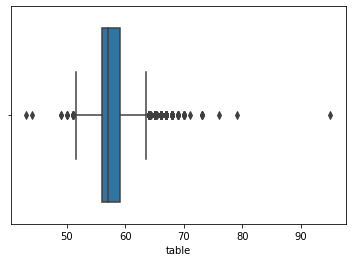

In [5]:
sns.boxplot(x = df_table);

**Bu grafik 50 civarından öncesi ve 63 civarından sonrasını aykırı değerler kabul etmiş gibi görünüyor. Tam değerleri bulacağız.**

### <font color=purple>2.1. Eşik değerleri buluyoruz. </font>

In [12]:
Q1 = df_table.quantile(0.25) 
Q3 = df_table.quantile(0.75)

# bu, değişkenin değerleri küçükten büyüğe sıralandığında %25.indeksine gelen değeri alacak.

IQR = Q3-Q1 

# veri setinin %25'lik indeksine karşılık gelen değer ve %75'lik indeksine karşılık gelen
# değerler üzerinden bir değer hesaplayacağız bunun adı interquartile olarak geçiyor.

In [13]:
print("Q1:",Q1)
print("Q3:",Q3)
print("IQR:",IQR)

Q1: 56.0
Q3: 59.0
IQR: 3.0


In [14]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [15]:
print("alt sınır:",alt_sinir)
print("üst sınır:",ust_sinir)

alt sınır: 51.5
üst sınır: 63.5


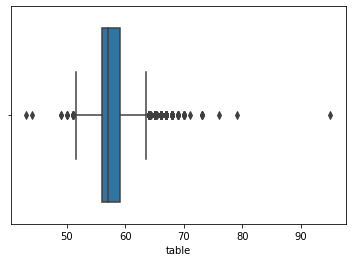

In [16]:
sns.boxplot(x = df_table);

### <font color=purple>2.2. Aykırı değerleri buluyoruz. </font>

In [18]:
(df_table < alt_sinir) | (df_table > ust_sinir)

# bu şekilde ya alt sınırdan küçük olanları ya da üst sınırdan büyük olanları sorgulamış olduk.

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [19]:
aykiri_tf = df_table < alt_sinir 

# alt sınırdan küçük olanları aykiri_tf'ye atadık.

In [20]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### <font color=purple>2.3. Aykırı değerlerin olduğu gözlemlerin indekslerine erişiyoruz. </font>

In [21]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

**İndeks olarak alabilmek neden önemli? Bu indekslere ait gözlemlerle ilgili bir düzeltme işlemi yapmak istediğimizde bu silmek olabilir, ortalamaya çevirmek olabilir, baskılamak olabilir. Buna benzer bir işlem yapmak istediğimizde bunlara erişmemiz gerekecek.**

## 3. Aykırı Değer Problemini Çözmek

### <font color=purple>3.1. Silme Yöntemi</font>

**Aykırı değerler silinerek çalışmanın dışında bırakılabilir.**

In [21]:
type(df_table)

pandas.core.series.Series

**Şu an pandas *seriesi* formunda, pandas *dataframe*'ine çevirmemiz gerekiyor.** 

In [22]:
import pandas as pd

df_table = pd.DataFrame(df_table)

In [26]:
type(df_table)

pandas.core.frame.DataFrame

In [23]:
df_table

table
0       55.0
1       61.0
2       65.0
3       58.0
4       58.0
...      ...
53935   57.0
53936   55.0
53937   60.0
53938   58.0
53939   55.0

[53940 rows x 1 columns]

In [25]:
df_table.shape

(53940, 1)

**Dataframe'imiz içerisinde aykırı olmayan değerlere erişmeye çalışalım.**

In [30]:
t_df = df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis=1)]

* `~` işareti koşulu sağlamayanları al anlamına geliyor. Yani alt sınırdan düşük olanları ya da üst sınırdan yüksek olanları göz önünde bulundurduğumuzda bunların dışındakileri seçme işlemi yapıyor.

* `axis=1` sütun bazında işlem yap anlamına geliyor.

In [31]:
t_df.head()

table
0   55.0
1   61.0
3   58.0
4   58.0
5   57.0

In [32]:
df_table.shape

(53940, 1)

In [33]:
t_df.shape

(53335, 1)

**53940 tane gözlem birimimiz vardı outlier gözlemleri (605 adet) atınca geriye 53335 adet gözlem kaldı.**

### <font color=purple>3.2. Ortalama Yöntemi</font>

**Bu sefer yakalamış olduğumuz aykırı değerleri silmek yerine ortalama ile değiştirmek istiyoruz.**

In [34]:
type(df_table) # dataframe olarak kaldığı için yeniden seriese dönüştüreceğiz.

pandas.core.frame.DataFrame

In [35]:
df_table = df["table"]

In [36]:
type(df_table)

pandas.core.series.Series

In [37]:
df_table[aykiri_tf] # alt sınırdan küçük olan değerler

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [38]:
df_table.mean()

57.45718390804603

**Aykırı değerleri ortalamayla değiştiriyoruz.**

In [39]:
df_table[aykiri_tf] = df_table.mean() 

C:\Users\aa\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### <font color=purple>3.3. Baskılama Yöntemi</font>

Baskılama yönteminde, aykırılıklar yakalandıktan sonra üst taraftaysa üst sınır değerine eşitlenir, alt taraftaysa alt sınır değerine eşitlenir. Böylece aykırı değerlerin veri setini yukarı yönlü ya da aşağı yönlü çekme çabası göz önünde bulundurulmuş olup onları ortalamayla değiştirmekten bazı senaryolarda çok daha mantıklı bir aksiyon alınmış olur. 

Yani bir aykırı gözlem zaten veri setinin uçlarında oluşan bir değerdir. Bunu komple silmek yerine ortalamayla değiştirmek mantıklı olabilir. Ama veri setinin ortalamasıyla aykırı gözlemin gerçek değeri arasında çok ciddi bir fark varsa bu durumda örneğin 100 civarlarında olan bir değeri gelip 57 gibi bir değere atamış olduk. Bunun yerine 100 gibi bir değerin taşımış olduğu bilgiyi biraz törpülemiş olsak da sınırlara doğru baskılayarak onun taşıdığı bilgiyi özüne uygun bir şekilde veri setinin içerisinde tutabiliriz.

In [41]:
import seaborn as sns

df = sns.load_dataset('diamonds') # seaborn kütüphanesi içerisinden datasetini çektik.
df = df.select_dtypes(include = ['float64','int64']) # sadece sayısal değişkenleri alıyoruz.
df = df.dropna() # veri setinin içerisindeki eksik değerleri siliyoruz direkt.
df.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [42]:
df_table = df["table"]

In [43]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [44]:
alt_sinir

51.5

In [45]:
df_table[aykiri_tf] = alt_sinir

C:\Users\aa\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64